In [2]:
!pip install prophet

In [5]:
import yfinance as yf
import pandas as pd
import datetime as dt

In [10]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

df = yf.download("TSLA", start, end).reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [12]:
df = df[['Date', 'Close']]

In [13]:
df.head()

,Date,Close
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334


In [14]:
df.columns = ["ds", "y"]

In [15]:
df

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1077,2024-04-15,161.479996
1078,2024-04-16,157.110001
1079,2024-04-17,155.449997
1080,2024-04-18,149.929993


In [16]:
from prophet import Prophet

In [17]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuyfk63vm/hpupj6ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuyfk63vm/_ku29of7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44512', 'data', 'file=/tmp/tmpuyfk63vm/hpupj6ct.json', 'init=/tmp/tmpuyfk63vm/_ku29of7.json', 'output', 'file=/tmp/tmpuyfk63vm/prophet_model7pmraym2/prophet_model-20240422120622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

In [19]:
from prophet.plot import plot_plotly

plot_plotly(prophet, predictions)

In [20]:
unknown_data = df.iloc[-90:]
data = df.iloc[:-90]

In [22]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuyfk63vm/derjezi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuyfk63vm/skkee32y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25778', 'data', 'file=/tmp/tmpuyfk63vm/derjezi8.json', 'init=/tmp/tmpuyfk63vm/skkee32y.json', 'output', 'file=/tmp/tmpuyfk63vm/prophet_model66fkuag5/prophet_model-20240422131036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
plot_plotly(prophet, predictions)

In [30]:
pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

<Figure size 2000x800 with 0 Axes>

In [28]:
unknown_data

,ds,y
992,2023-12-11,239.740005
993,2023-12-12,237.009995
994,2023-12-13,239.289993
995,2023-12-14,251.050003
996,2023-12-15,253.500000
...,...,...
1077,2024-04-15,161.479996
1078,2024-04-16,157.110001
1079,2024-04-17,155.449997
1080,2024-04-18,149.929993


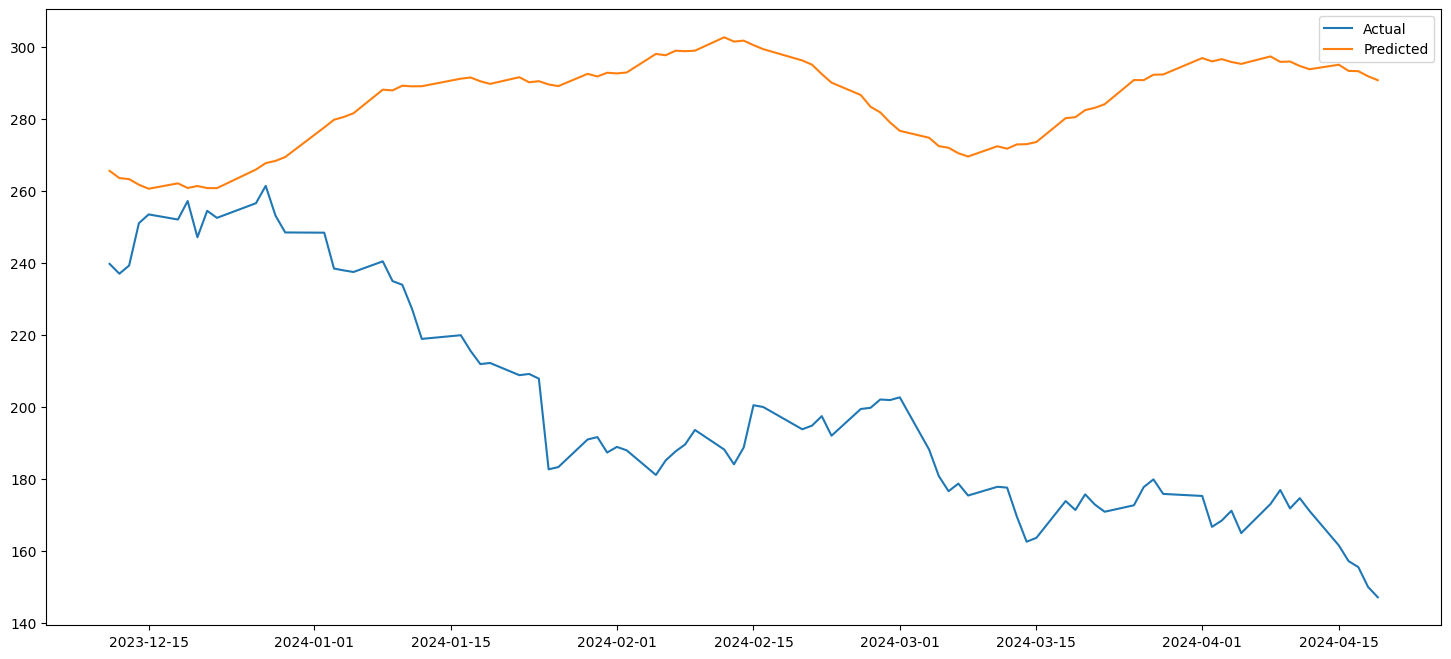

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label='Actual')
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label='Predicted')
plt.legend()
plt.show()